# Home Credit Default Risk Analysis 
*Dimitar Vlassarev 2018*

# Imports and Data Loading

## Load Libraries

In [21]:
import itertools
import kaggle as kg
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import  Image
%matplotlib inline

## Download and Import Data

In [1]:
# Install Kaggle API - note that you still need an API key in the right location
# More details here: https://github.com/Kaggle/kaggle-api
!pip install kaggle

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Download from Kaggle
kg.api.competition_download_files("home-credit-default-risk", "data")

In [13]:
# Load data into dataframes
application_train     = pd.read_csv(r"data/application_train.csv.zip")
application_test      = pd.read_csv(r"data/application_test.csv.zip")
bureau                = pd.read_csv(r"data/bureau.csv.zip")
bureau_balance        = pd.read_csv(r"data/bureau_balance.csv.zip")
credit_card_balance   = pd.read_csv(r"data/credit_card_balance.csv.zip")
installments_payments = pd.read_csv(r"data/installments_payments.csv.zip")
pos_cash_balance      = pd.read_csv(r"data/POS_CASH_balance.csv.zip")
previous_application  = pd.read_csv(r"data/previous_application.csv.zip")
columns_description   = pd.read_csv(r"data/HomeCredit_columns_description.csv", encoding='cp1252')

## Display Column descriptions

In [17]:
# Column descriptions
pd.options.display.max_rows = 500
display(columns_description)
pd.reset_option("max_rows")

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


# Exploratory Data Analysis
EDA based on: https://www.kaggle.com/pavanraj159/loan-repayers-v-s-loan-defaulters-home-credit

## Data Dimensions

In [5]:
print ("application_train     :", application_train.shape)
print ("application_test      :", application_test.shape)
print ("bureau                :", bureau.shape)
print ("bureau_balance        :", bureau_balance.shape)
print ("credit_card_balance   :", credit_card_balance.shape)
print ("installments_payments :", installments_payments.shape)
print ("pos_cash_balance      :", pos_cash_balance.shape)
print ("previous_application  :", previous_application.shape)

application_train     : (307511, 122)
application_test      : (48744, 121)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


## Columns Descriptions

In [ ]:
columns_description

## First Few Rows

In [6]:
display("application_train")
display(application_train.head(3))
display("application_test")
display(application_test.head(3))
display("bureau")
display(bureau.head(3))
display("bureau_balance")
display(bureau_balance.head(3))
display("credit_card_balance")
display(credit_card_balance.head(3))
display("installments_payments")
display(installments_payments.head(3))
display("pos_cash_balance")
display(pos_cash_balance.head(3))
display("previous_application")
display(previous_application.head(3))

'application_train'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


'application_test'

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


'bureau'

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


'bureau_balance'

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


'credit_card_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


'installments_payments'

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


'pos_cash_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


'previous_application'

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


## Data Schema

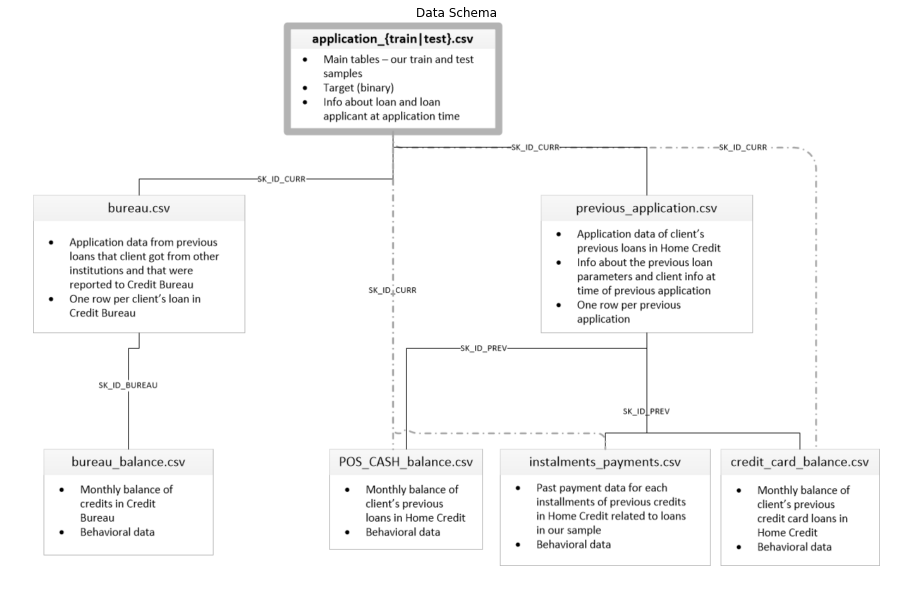

In [28]:
image = np.array(Image.open(r"static/home_credit.png"))
fig = plt.figure(figsize=(20,10))
plt.imshow(image,interpolation="bilinear")
plt.axis("off")
_ = plt.title("Data Schema")

## Missing Data Analysis

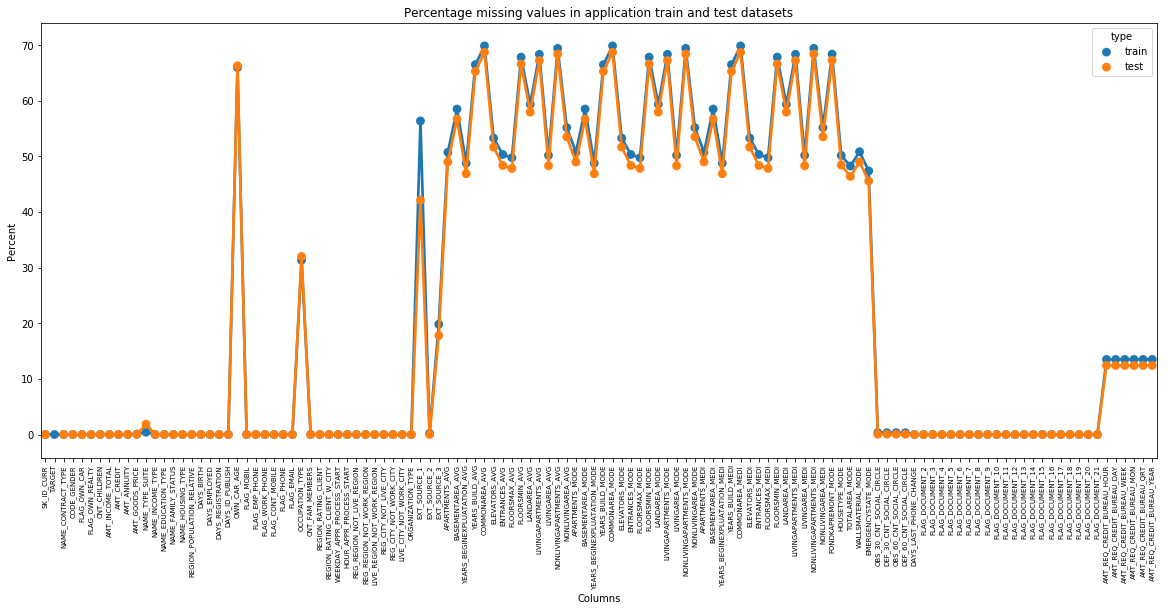

In [27]:
# Prep train-test data
miss_train = pd.DataFrame((application_train.isnull().sum()) * 100 / application_train.shape[0]).reset_index()
miss_test  = pd.DataFrame((application_test.isnull().sum()) * 100 / application_test.shape[0]).reset_index()
miss_train["type"] = "train"
miss_test["type"]  =  "test"
missing = pd.concat([miss_train, miss_test], axis=0)

# Plot misssing data vs column
fig = plt.figure(figsize=(20, 8))
ax = sns.pointplot("index", 0, data=missing, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage missing values in application train and test datasets")
plt.ylabel("Percent")
_ = plt.xlabel("Columns")

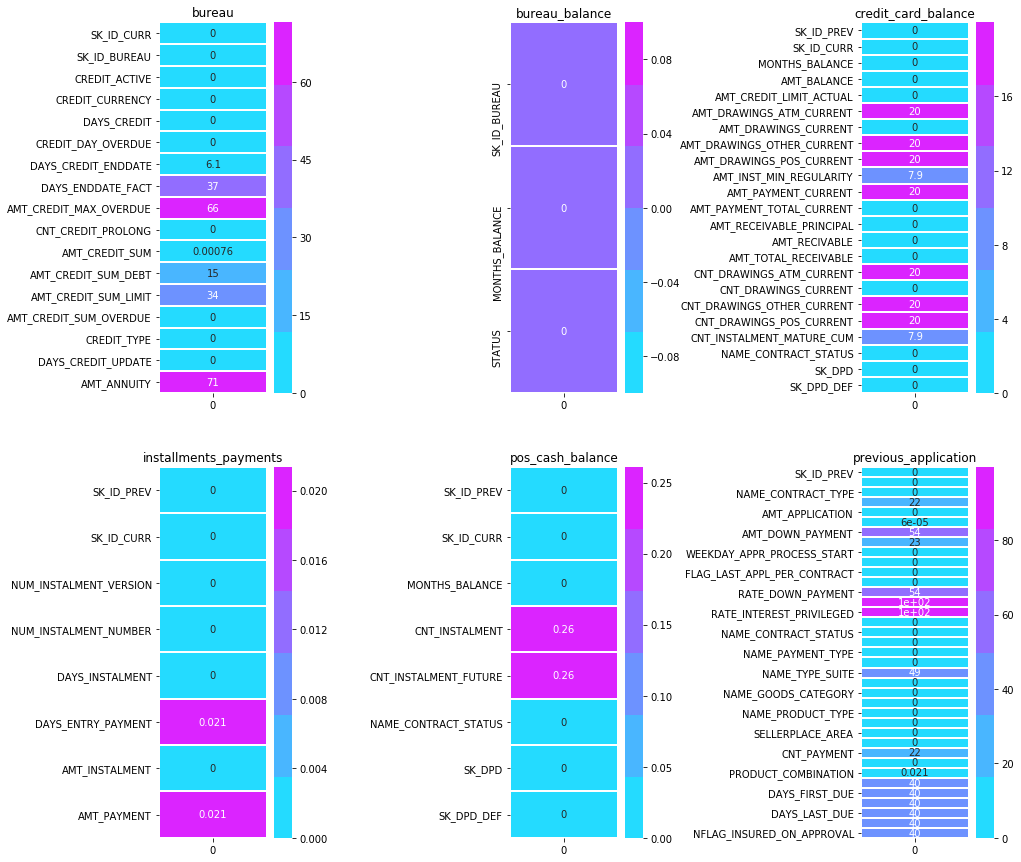

In [30]:
plt.figure(figsize=(15,15))

# Bureau data
plt.subplot(231)
sns.heatmap(pd.DataFrame(bureau.isnull().sum() / bureau.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("bureau")

# Bureau balance data
plt.subplot(232)
sns.heatmap(pd.DataFrame(bureau_balance.isnull().sum() / bureau_balance.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("bureau_balance")

# Credit card balance
plt.subplot(233)
sns.heatmap(pd.DataFrame(credit_card_balance.isnull().sum() / credit_card_balance.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("credit_card_balance")

# Installments payments
plt.subplot(234)
sns.heatmap(pd.DataFrame(installments_payments.isnull().sum() / installments_payments.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("installments_payments")

# Cash balance
plt.subplot(235)
sns.heatmap(pd.DataFrame(pos_cash_balance.isnull().sum() / pos_cash_balance.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("pos_cash_balance")

# Previous Application
plt.subplot(236)
sns.heatmap(pd.DataFrame(previous_application.isnull().sum() / previous_application.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("previous_application")

plt.subplots_adjust(wspace = 1.6)

## Distribution of Target variable
    TARGET: Target variable 
    1 - client with payment difficulties, >X days late payment on >0 of the first Y loan installments
    0 - all other cases
    
    8% out of total client population have difficulties in repaying loans.

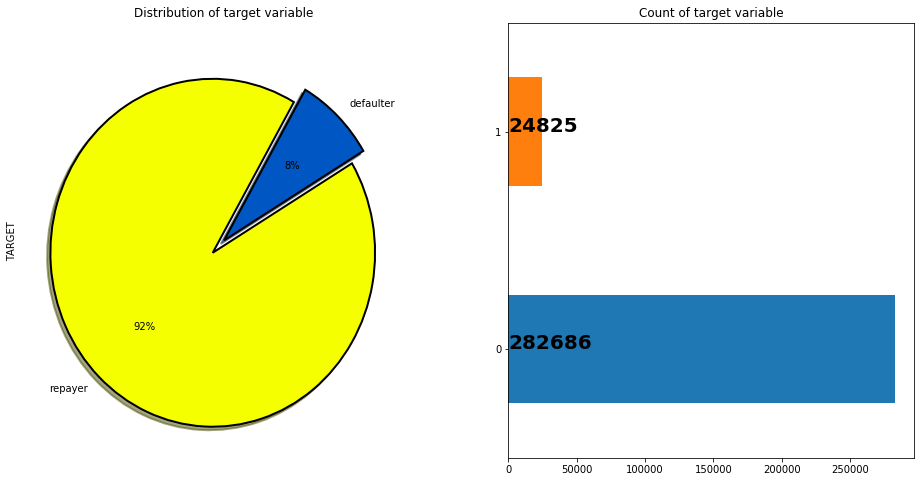

In [9]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
application_train["TARGET"].value_counts() \
                           .plot.pie(autopct="%1.0f%%", 
                                     colors=sns.color_palette("prism", 7),
                                     startangle=60,
                                     labels=["repayer","defaulter"],
                                     wedgeprops={"linewidth": 2, "edgecolor": "k"},
                                     explode=[.1, 0],
                                     shadow=True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_train["TARGET"].value_counts() \
                                .plot(kind="barh")

for i,j in enumerate(application_train["TARGET"].value_counts().values):
    ax.text(.7, i, j, weight="bold", fontsize=20)

_ = plt.title("Count of target variable")

## Comparing summary statistics between defaulters and non - defaulters for loan amounts .
    Income of client -
    1 . average income of clients who default and who do not are almost same.
    2 . standard deviation in income of client who default is very high compared to who do not default. 3 . clients who default also has maximum income earnings

    Credit amount of the loan ,Loan annuity,Amount goods price -
    1 .statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

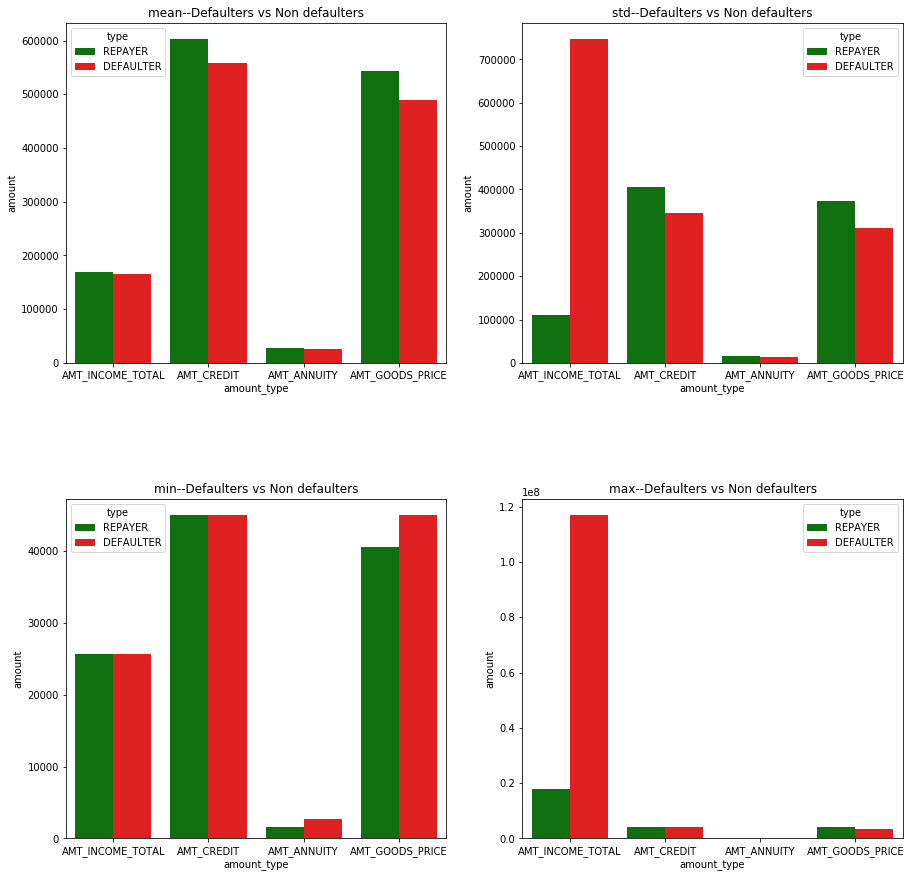

In [25]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

df = application_train.groupby("TARGET")[cols] \
                      .describe() \
                      .transpose() \
                      .reset_index()

df = df[df["level_1"].isin(["mean", "std", "min", "max"])] 
df_x = df[["level_0", "level_1", 0]]
df_y = df[["level_0", "level_1", 1]]
df_x = df_x.rename(columns={"level_0": "amount_type", "level_1": "statistic", 0: "amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={"level_0": "amount_type", 'level_1': "statistic", 1: "amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x, df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(15, 15))

for i, j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2, 2, j + 1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],
                      df_new[df_new["statistic"] == i]["amount"],
                      hue=df_new[df_new["statistic"] == i]["type"],
                      palette=["g","r"])
    
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace=.4)

## Pair Plot between amount variables
    AMT_INCOME_TOTAL - Income of the client
    AMT_CREDIT - Credit amount of the loan
    AMT_ANNUITY - Loan annuity
    AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

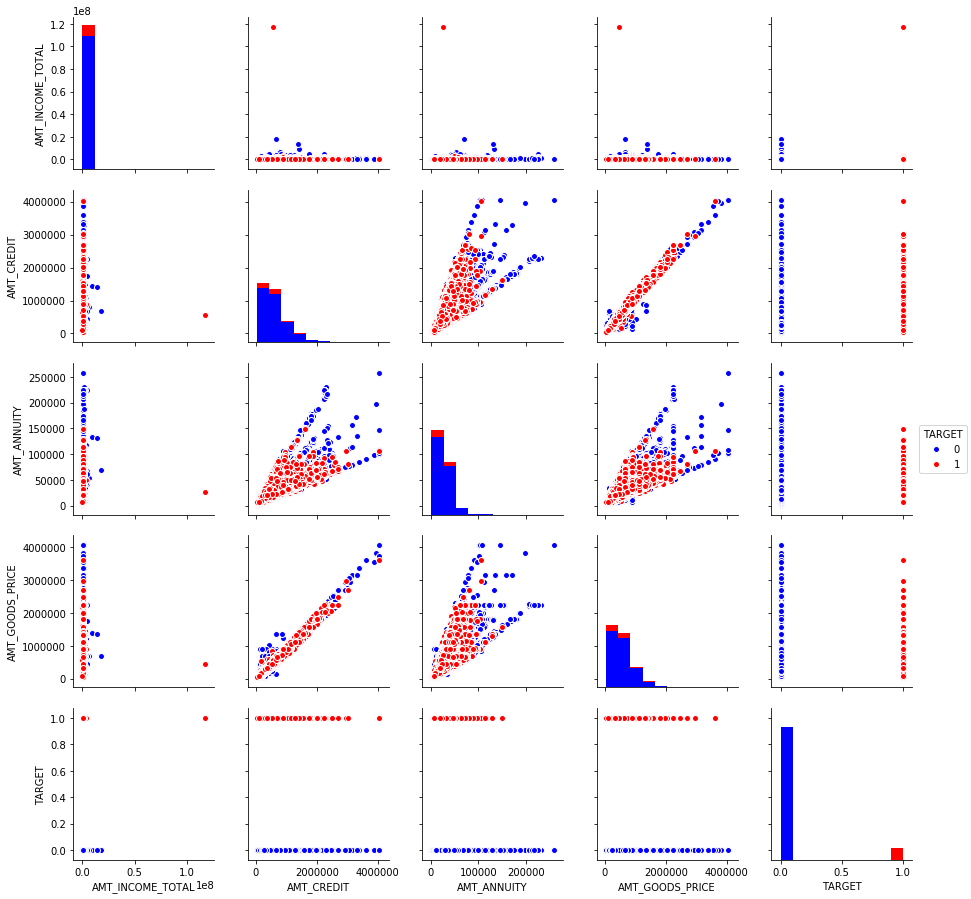

In [26]:
amt = application_train[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt, hue="TARGET", palette=["b", "r"])

## Client's age
    DAYS_BIRTH - Client's age in days at the time of application.
    average clients age is comparatively less in non repayers than repayers in every aspect.
    younger people tend to default more than elder people.

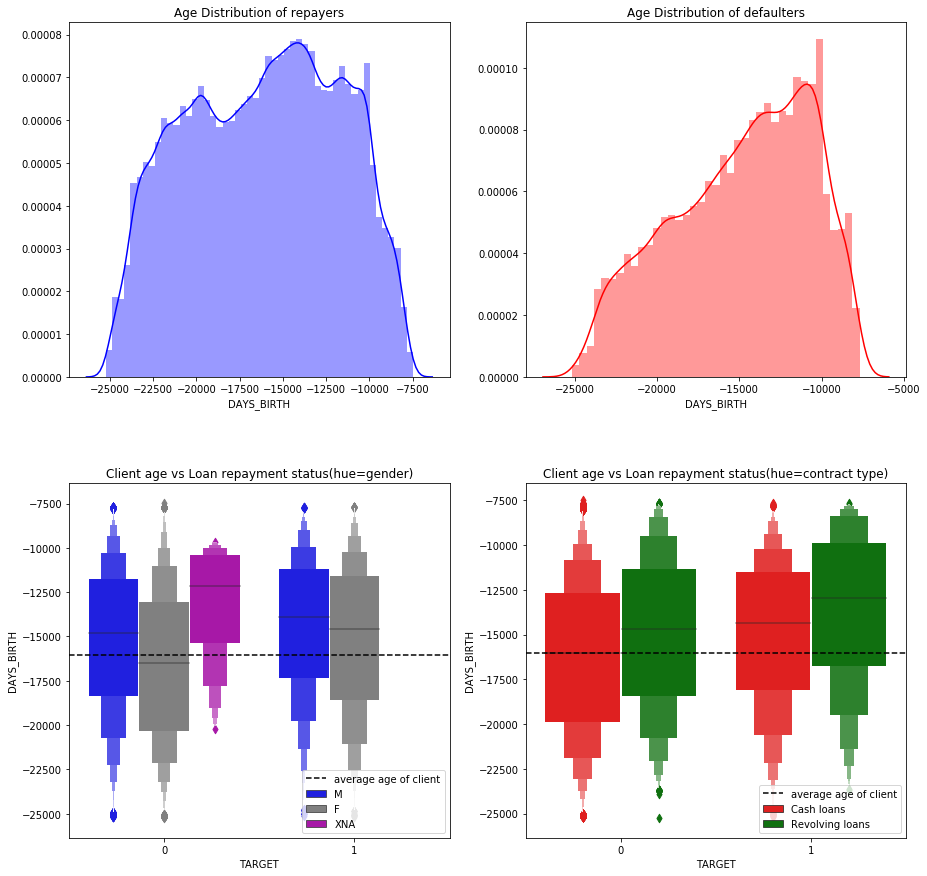

In [27]:
fig = plt.figure(figsize=(15, 15))

plt.subplot(221)
sns.distplot(application_train[application_train["TARGET"] == 0]["DAYS_BIRTH"], color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(application_train[application_train["TARGET"] == 1]["DAYS_BIRTH"], color="r")
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.lvplot(application_train["TARGET"],
           application_train["DAYS_BIRTH"],
           hue=application_train["CODE_GENDER"],
           palette=["b", "grey", "m"])

plt.axhline(application_train["DAYS_BIRTH"].mean(),
            linestyle="dashed",
            color="k",
            label="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=gender)")

plt.subplot(224)
sns.lvplot(application_train["TARGET"],
           application_train["DAYS_BIRTH"],
           hue=application_train["NAME_CONTRACT_TYPE"],
           palette=["r", "g"])

plt.axhline(application_train["DAYS_BIRTH"].mean(),
            linestyle="dashed",
            color="k",
            label ="average age of client")

plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=contract type)")

_ = plt.subplots_adjust(wspace=.2, hspace = .3)

## Occupation percentage in data with respect to repayment status
    OCCUPATION_TYPE - What kind of occupation does the client have.
    occupations like Cleaning staff ,Cooking staff, Drivers ,Laborers , Low-skill Laborers ,Sales staff ,Security staff are more likely to default in loans.

Text(0.5,1,'Occupation percentage in data with respect to repayment status')

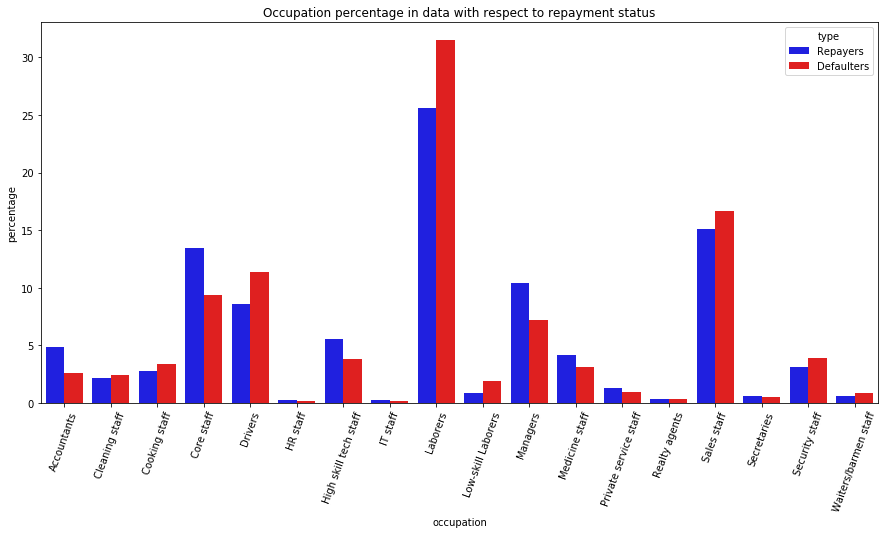

In [34]:
fig = plt.figure(figsize=(15, 7))
occ = application_train[application_train["TARGET"] == 0]["OCCUPATION_TYPE"].value_counts().reset_index()
occ = occ.sort_values(by="index", ascending=True)
occ1 = application_train[application_train["TARGET"] == 1]["OCCUPATION_TYPE"].value_counts().reset_index()
occ1 = occ1.sort_values(by="index", ascending=True)
occ["percentage"]  = (occ["OCCUPATION_TYPE"] * 100 / occ["OCCUPATION_TYPE"].sum())
occ1["percentage"] = (occ1["OCCUPATION_TYPE"] * 100 / occ1["OCCUPATION_TYPE"].sum())
occ["type"]        = "Repayers"
occ1["type"]       = "Defaulters"
occupation = pd.concat([occ, occ1], axis=0)

ax = sns.barplot("index", "percentage", data=occupation, hue="type", palette=["b", "r"])
plt.xticks(rotation = 70)
plt.xlabel("occupation")
plt.title("Occupation percentage in data with respect to repayment status")

## Days Between Current and last Credit Bureau Credit Application
    DAYS_CREDIT - How many days before current application did client apply for Credit Bureau credit.
    The average days of defaulters applying for bureau before current application is less compared to repayers.

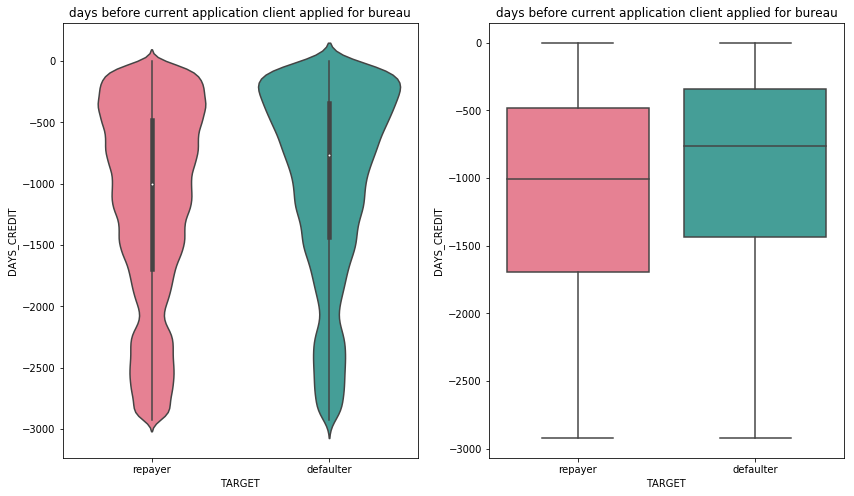

In [35]:
# Join bureau data
app_tar = application_train[["TARGET", "SK_ID_CURR"]]
app_bureau = bureau.merge(app_tar,
                          left_on="SK_ID_CURR",
                          right_on="SK_ID_CURR",
                          how="left")
# Plot data
app_bureau["TARGET"] = app_bureau["TARGET"].replace({1: "defaulter", 0: "repayer"})

plt.figure(figsize=(14, 8))

plt.subplot(121)
sns.violinplot(y=app_bureau["DAYS_CREDIT"],
               x=app_bureau["TARGET"],
               palette="husl")
plt.title("days before current application client applied for bureau")

plt.subplot(122)
sns.boxplot(y=app_bureau["DAYS_CREDIT"],
            x=app_bureau["TARGET"],
            palette="husl")
_ = plt.title("days before current application client applied for bureau")

## Average Normalized information about building where the client lives.
    APARTMENTS_AVG - apartment size.
    BASEMENTAREA_AVG - basement area .
    YEARS_BEGINEXPLUATATION_AVG - years begin expluatation .
    YEARS_BUILD_AVG - build years.
    COMMONAREA_AVG - common area.
    ELEVATORS_AVG - number of elevators.
    ENTRANCES_AVG - number of entrances.
    FLOORSMAX_AVG - maximum floors.
    FLOORSMIN_AVG - minimum floors.
    LANDAREA_AVG - land area .
    LIVINGAPARTMENTS_AVG - living apartaents.
    LIVINGAREA_AVG - living area.
    NONLIVINGAPARTMENTS_AVG - non living apartments.
    NONLIVINGAREA_AVG -non living area.

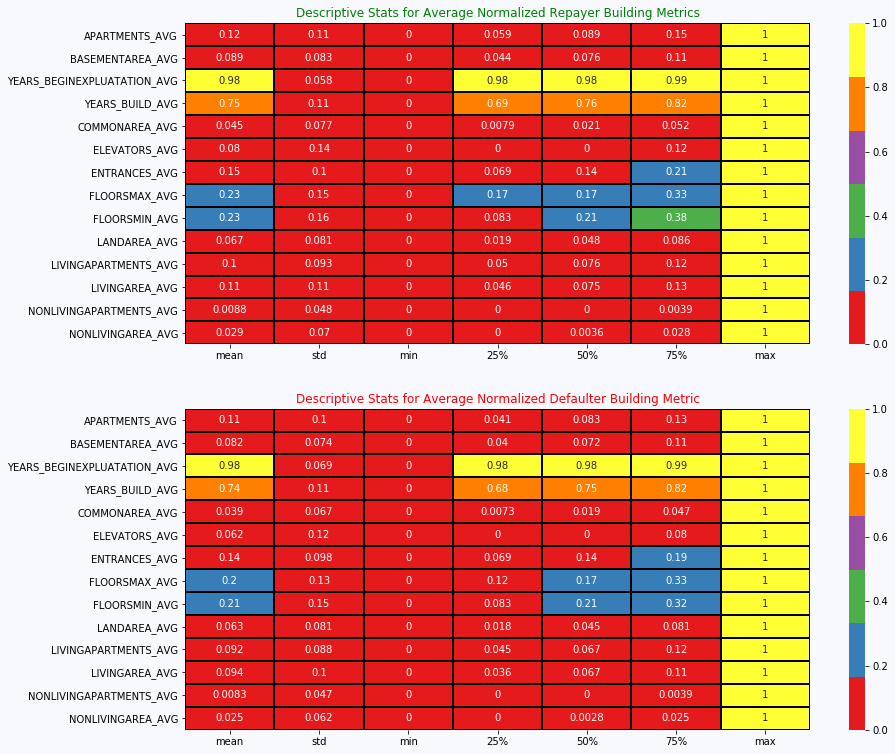

In [40]:
fig = plt.figure(figsize=(14, 13))

cols = ["APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",
       "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG",
       "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", 
        "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG"]

plt.subplot(211)
sns.heatmap(application_train[application_train["TARGET"] == 0][cols].describe()[1:].transpose(),
            annot=True,
            cmap=sns.color_palette("Set1"),
            linecolor="k",
            linewidth=1)
plt.title("Descriptive Stats for Average Normalized Repayer Building Metrics", color="g")

plt.subplot(212)
sns.heatmap(application_train[application_train["TARGET"] == 1][cols].describe()[1:].transpose(),
            annot=True,
            cmap=sns.color_palette("Set1"),
            linecolor="k",
            linewidth=1)

plt.title("Descriptive Stats for Average Normalized Defaulter Building Metric", color="r")
fig.set_facecolor("ghostwhite")

## Distribution of credit duration variables
    CREDIT_DAY_OVERDUE - Number of days past due on CB credit at the time of application for related loan in our sample.
    DAYS_CREDIT_ENDDATE - Remaining duration of CB credit (in days) at the time of application in Home Credit.
    DAYS_ENDDATE_FACT - Days since CB credit ended at the time of application in Home Credit (only for closed credit).
    DAYS_CREDIT_UPDATE - How many days before loan application did last information about the Credit Bureau credit come.

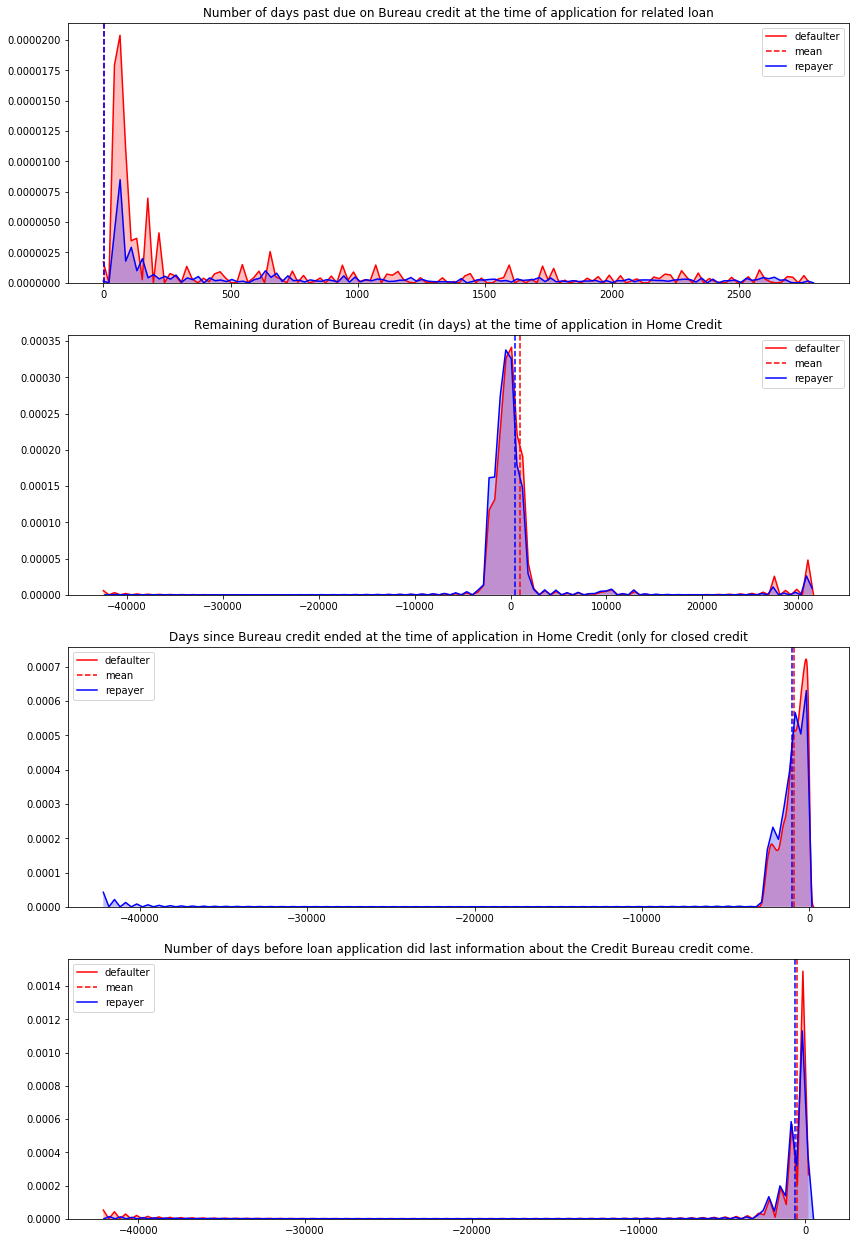

In [47]:
types = ["defaulter", "repayer"]
length = len(types)
cs = ["r", "b"]

fig = plt.figure(figsize=(14, 22))
plt.subplot(411)
for i, j, k in itertools.zip_longest(types, (range(length)), cs):
    ax = sns.kdeplot(app_bureau[(app_bureau["TARGET"] == i) & 
                                (app_bureau["CREDIT_DAY_OVERDUE"].notnull())]["CREDIT_DAY_OVERDUE"],
                     shade=True,
                     color=k,
                     label=i)
    plt.axvline(app_bureau[(app_bureau["TARGET"] == i) & 
                           (app_bureau["CREDIT_DAY_OVERDUE"].notnull())]["CREDIT_DAY_OVERDUE"].mean(),
                color=k,
                linestyle="dashed",
                label="mean")
    plt.title("Number of days past due on Bureau credit at the time of application for related loan")
    
plt.subplot(412)
for i, j, k in itertools.zip_longest(types, (range(length)), cs):
    ax = sns.kdeplot(app_bureau[(app_bureau["TARGET"] == i) & 
                                (app_bureau["DAYS_CREDIT_ENDDATE"].notnull())]["DAYS_CREDIT_ENDDATE"],
                     shade=True,
                     color=k,
                     label=i)
    plt.axvline(app_bureau[(app_bureau["TARGET"] == i) & 
                           (app_bureau["DAYS_CREDIT_ENDDATE"].notnull())]["DAYS_CREDIT_ENDDATE"].mean(),
                color=k,
                linestyle="dashed",
                label="mean")
    plt.title("Remaining duration of Bureau credit (in days) at the time of application in Home Credit")
    
plt.subplot(413)
for i, j, k in itertools.zip_longest(types,(range(length)),cs):
    ax = sns.kdeplot(app_bureau[(app_bureau["TARGET"] == i) & 
                                (app_bureau["DAYS_ENDDATE_FACT"].notnull())]["DAYS_ENDDATE_FACT"],
                     shade=True,
                     color=k,
                     label=i)
    plt.axvline(app_bureau[(app_bureau["TARGET"] == i) & 
                           (app_bureau["DAYS_ENDDATE_FACT"].notnull())]["DAYS_ENDDATE_FACT"].mean(),
                color=k,
                linestyle="dashed",
                label="mean")
    plt.title("Days since Bureau credit ended at the time of application in Home Credit (only for closed credit")

plt.subplot(414)
for i, j, k in itertools.zip_longest(types, (range(length)), cs):
    ax = sns.kdeplot(app_bureau[(app_bureau["TARGET"] == i) & 
                                (app_bureau["DAYS_CREDIT_UPDATE"].notnull())]["DAYS_CREDIT_UPDATE"],
                     shade=True,
                     color=k,
                     label=i)
    plt.axvline(app_bureau[(app_bureau["TARGET"] == i) & 
                           (app_bureau["DAYS_CREDIT_UPDATE"].notnull())]["DAYS_CREDIT_UPDATE"].mean(),
                color=k,
                linestyle="dashed",
                label="mean")
    plt.title("Number of days before loan application did last information about the Credit Bureau credit come.")


## Percentage of applications accepted, canceled,refused and unused for different loan purposes.
    NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.
    NAME_CONTRACT_STATUS - Contract status (approved, canceled, ...) of previous application.
    Purposes like XAP ,electronic equipment, every day expenses and education have maximum loan acceptance.
    Loan purposes like payment of other loans ,refusal to name goal ,buying new home or car have most refusals.
    40% of XNA purpose loans are cancaled.

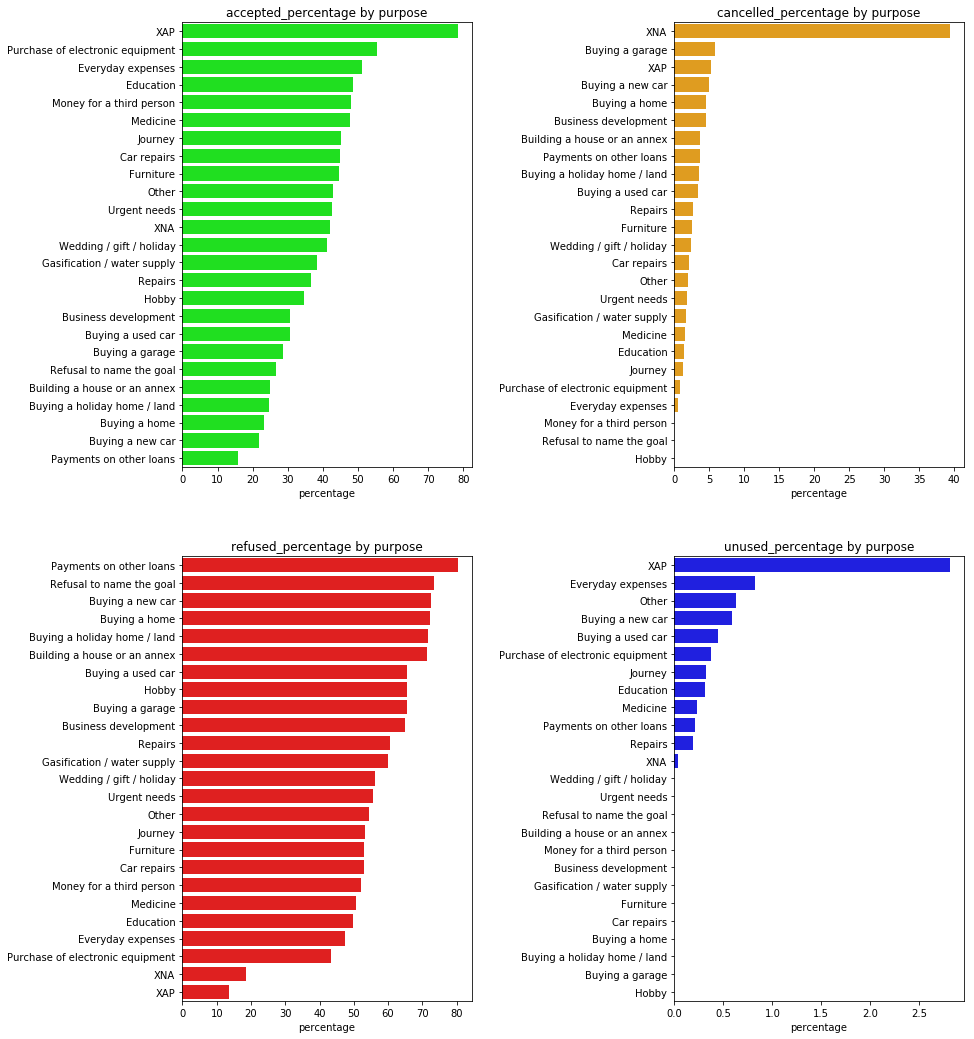

In [50]:
previous_application[["NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(previous_application["NAME_CASH_LOAN_PURPOSE"],
                      previous_application["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"] * 100) / (purpose["Approved"] + 
                                              purpose["Canceled"] +
                                              purpose["Refused"] +
                                              purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"] * 100) / (purpose["Approved"] +
                                              purpose["Canceled"] +
                                              purpose["Refused"] +
                                              purpose["Unused offer"])
purpose["r"] = (purpose["Refused"] * 100) / (purpose["Approved"] +
                                             purpose["Canceled"] +
                                             purpose["Refused"] +
                                             purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"] * 100) / (purpose["Approved"] +
                                                  purpose["Canceled"] +
                                                  purpose["Refused"] +
                                                  purpose["Unused offer"])
purpose_new = purpose[["a", "c", "r", "u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"] \
                                        .replace({"a": "accepted_percentage", "c": "cancelled_percentage",
                                                  "r": "refused_percentage", "u": "unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime", "orange", "r", "b"]

fig = plt.figure(figsize=(14, 18))
for i, j, k in itertools.zip_longest(lst, range(length), cs):
    plt.subplot(2, 2, j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0, "NAME_CASH_LOAN_PURPOSE", data=dat.sort_values(by=0, ascending=False), color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace=.7)
